In [199]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import json_normalize
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import folium
# from folium import plugins
from folium.plugins import HeatMap
from PIL import Image

In [4]:
# Denver
denver_file = '../data/denver.json'

with open(denver_file) as denver_file:
  denver = json.load(denver_file)

In [5]:
# Park City
park_city_file = '../data/parkcity.json'

with open(park_city_file) as park_city_file:
  park_city = json.load(park_city_file)

In [6]:
# Moab
moab_file = '../data/moab.json'

with open(moab_file) as moab_file:
  moab = json.load(moab_file)

In [7]:
# Sedona
sedona_file = '../data/sedona.json'

with open(sedona_file) as sedona_file:
  sedona = json.load(sedona_file)

In [8]:
# Marin County
marin_county_file = '../data/marincounty.json'

with open(marin_county_file) as marin_county_file:
  marin_county = json.load(marin_county_file)

In [9]:
# Crested Butte
crested_butte_file = '../data/crestedbutte.json'

with open(crested_butte_file) as crested_butte_file:
  crested_butte = json.load(crested_butte_file)

In [10]:
denver_trails = denver['trails']
denver_df = json_normalize(denver_trails)
denver_df["location"] = "denver"

In [11]:
denver_df.head()

,id,name,type,summary,difficulty,stars,starVotes,location,url,imgSqSmall,...,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate
0,7015764,Little Scraggy Trail Loop,Recommended Route,"A great, new flow trail at Buffalo Creek, whic...",blueBlack,4.7,570,denver,https://www.mtbproject.com/trail/7015764/littl...,https://cdn2.apstatic.com/photos/mtb/7011149_s...,...,12.6,1432,-1443,8534,7659,-105.2573,39.3443,All Clear,Dry,2020-07-20 11:16:52
1,845269,Buffalo Creek Big Loop - IMBA EPIC,Recommended Route,A nice tour of some of the best of Buffalo Cre...,blue,4.6,295,denver,https://www.mtbproject.com/trail/845269/buffal...,https://cdn2.apstatic.com/photos/mtb/7013659_s...,...,24.2,2590,-2586,8054,6672,-105.2744,39.3866,All Clear,Dry,2020-07-19 12:23:29
2,858508,Buffalo Creek Loop - Pine Lake Trailhead,Recommended Route,A nice tour of popular Buffalo Creek trails on...,blue,4.3,83,denver,https://www.mtbproject.com/trail/858508/buffal...,https://cdn2.apstatic.com/photos/mtb/7031299_s...,...,20.6,2418,-2422,8051,6865,-105.3473,39.4083,Minor Issues,Dry - Very loose dirt,2020-07-03 15:00:14
3,31804,Centennial Cone,Recommended Route,One of the better beginner/intermediate rides ...,blue,4.1,337,denver,https://www.mtbproject.com/trail/31804/centenn...,https://cdn2.apstatic.com/photos/mtb/7029901_s...,...,17.2,2340,-2348,7911,6804,-105.3710,39.7372,All Clear,Dry,2020-07-18 09:40:59
4,46286,Betasso Preserve,Recommended Route,A solid ride close to Boulder that is often ri...,blue,4.1,264,denver,https://www.mtbproject.com/trail/46286/betasso...,https://cdn2.apstatic.com/photos/mtb/7002944_s...,...,7.4,829,-829,6589,6178,-105.3422,40.0155,All Clear,Dry,2020-07-17 16:55:32


In [12]:
print(round(denver_df['stars'].mean(),2))

3.95


In [13]:
park_city_trails = park_city['trails']
park_city_df = json_normalize(park_city_trails)
park_city_df["location"] = "park_city"

In [14]:
print(round(park_city_df['stars'].mean(),2))

4.09


In [84]:
moab_trails = moab['trails']
moab_df = json_normalize(moab_trails)
moab_df["location"] = "moab"

print(round(moab_df['stars'].mean(),2))

4.0


In [85]:
sedona_trails = sedona['trails']
sedona_df = json_normalize(sedona_trails)
sedona_df["location"] = "sedona"

print(round(sedona_df['stars'].mean(),2))

4.04


In [86]:
marin_county_trails = marin_county['trails']
marin_county_df = json_normalize(marin_county_trails)
marin_county_df["location"] = "marin_county"

print(round(marin_county_df['stars'].mean(),2))

4.07


In [87]:
crested_butte_trails = crested_butte['trails']
crested_butte_df = json_normalize(crested_butte_trails)
crested_butte_df["location"] = "crested_butte"

print(round(crested_butte_df['stars'].mean(),2))

4.34


In [19]:
crested_butte_df.describe()

,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude
count,2.000000e+02,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.137630e+06,4.344000,19.47500,11.373500,1373.710000,-1703.645000,9683.070000,8413.620000,-106.866169,38.972936
std,2.275695e+06,0.505909,36.86713,20.439846,2425.454043,2353.387089,1751.812682,1277.012561,0.440124,0.364290
min,4.266900e+04,2.700000,1.00000,0.100000,0.000000,-20196.000000,5566.000000,5437.000000,-108.545600,38.168000
25%,3.733432e+06,4.000000,5.00000,1.700000,59.000000,-2225.500000,8315.750000,7693.750000,-107.042350,38.731900
50%,6.083405e+06,4.400000,10.50000,5.300000,506.500000,-1142.500000,9805.000000,8535.000000,-106.927250,38.945550
75%,7.019166e+06,4.700000,20.00000,14.200000,1804.000000,-309.250000,10943.000000,9443.250000,-106.679575,39.225575
max,7.053466e+06,5.000000,329.00000,195.300000,20862.000000,0.000000,14418.000000,11082.000000,-105.995200,39.640000


In [20]:
# Columns
crested_butte_df.columns

Index(['id', 'name', 'type', 'summary', 'difficulty', 'stars', 'starVotes',
       'location', 'url', 'imgSqSmall', 'imgSmall', 'imgSmallMed', 'imgMedium',
       'length', 'ascent', 'descent', 'high', 'low', 'longitude', 'latitude',
       'conditionStatus', 'conditionDetails', 'conditionDate'],
      dtype='object')

In [121]:
crested_butte_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                200 non-null    int64  
 1   name              200 non-null    object 
 2   type              200 non-null    object 
 3   summary           200 non-null    object 
 4   difficulty        200 non-null    object 
 5   stars             200 non-null    float64
 6   starVotes         200 non-null    int64  
 7   location          200 non-null    object 
 8   url               200 non-null    object 
 9   imgSqSmall        200 non-null    object 
 10  imgSmall          200 non-null    object 
 11  imgSmallMed       200 non-null    object 
 12  imgMedium         200 non-null    object 
 13  length            200 non-null    float64
 14  ascent            200 non-null    int64  
 15  descent           200 non-null    int64  
 16  high              200 non-null    int64  
 1

In [21]:
cb_unique = crested_butte_df.copy()
cb_unique = cb_unique.groupby("difficulty")

In [22]:
cb_unique["difficulty"].unique()

difficulty
black            [black]
blue              [blue]
blueBlack    [blueBlack]
dblack          [dblack]
green            [green]
greenBlue    [greenBlue]
Name: difficulty, dtype: object

In [23]:
crested_butte_df[crested_butte_df["difficulty"] == "green"]["stars"].mean()

4.3

In [24]:
crested_butte_df[crested_butte_df["difficulty"] == "greenBlue"]["stars"].mean()

4.425

In [25]:
crested_butte_df[crested_butte_df["difficulty"] == "blue"]["stars"].mean()

4.451666666666667

In [26]:
crested_butte_df[crested_butte_df["difficulty"] == "blueBlack"]["stars"].mean()

4.266666666666666

In [27]:
crested_butte_df[crested_butte_df["difficulty"] == "black"]["stars"].mean()

4.265060240963854

In [28]:
crested_butte_df[crested_butte_df["difficulty"] == "dblack"]["stars"].mean()

4.569999999999999

In [29]:
crested_butte_df.groupby("difficulty")["stars"].mean()

difficulty
black        4.265060
blue         4.451667
blueBlack    4.266667
dblack       4.570000
green        4.300000
greenBlue    4.425000
Name: stars, dtype: float64

In [30]:
crested_butte_df.groupby("difficulty")["stars"].agg([min,max,sum])

,min,max,sum
difficulty,,,
black,2.7,5.0,354.0
blue,3.0,5.0,267.1
blueBlack,2.8,5.0,140.8
dblack,4.0,5.0,45.7
green,3.5,5.0,25.8
greenBlue,4.0,4.8,35.4


In [117]:
crested_butte_df.groupby("difficulty")["stars"].mean()

difficulty
black        4.265060
blue         4.451667
blueBlack    4.266667
dblack       4.570000
green        4.300000
greenBlue    4.425000
Name: stars, dtype: float64

In [31]:
crested_butte_df.pivot_table(values="stars",index="difficulty", aggfunc=[np.mean, np.median, np.min, np.max])

,mean,median,amin,amax
,stars,stars,stars,stars
difficulty,,,,
black,4.265060,4.40,2.7,5.0
blue,4.451667,4.45,3.0,5.0
blueBlack,4.266667,4.40,2.8,5.0
dblack,4.570000,4.55,4.0,5.0
green,4.300000,4.45,3.5,5.0
greenBlue,4.425000,4.50,4.0,4.8


In [32]:
crested_butte_df.set_index("difficulty")

,id,name,type,summary,stars,starVotes,location,url,imgSqSmall,imgSmall,...,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate
difficulty,,,,,,,,,,,,,,,,,,,,,
black,3671983,Monarch Crest - IMBA EPIC,Recommended Route,One of Colorado's top 5 epic rides - classic h...,4.7,300,crested_butte,https://www.mtbproject.com/trail/3671983/monar...,https://cdn2.apstatic.com/photos/mtb/7013256_s...,https://cdn2.apstatic.com/photos/mtb/7013256_s...,...,36.2,2035,-5890,11962,7458,-106.3254,38.4965,All Clear,Mostly Dry,2020-07-18 22:20:48
blueBlack,338027,401 Trail Loop,Recommended Route,The Crested Butte mega classic! High alpine me...,4.7,329,crested_butte,https://www.mtbproject.com/trail/338027/401-tr...,https://cdn2.apstatic.com/photos/mtb/7004088_s...,https://cdn2.apstatic.com/photos/mtb/7004088_s...,...,14.1,2249,-2222,11335,9584,-106.9937,38.9661,All Clear,Dry,2020-07-18 15:29:09
black,42669,Doctor Park,Recommended Route,A local favorite with a tough grind of a climb...,4.6,198,crested_butte,https://www.mtbproject.com/trail/42669/doctor-...,https://i.vimeocdn.com/video/494611652_640.jpg,https://i.vimeocdn.com/video/494611652_640.jpg,...,20.1,2734,-2719,10913,8335,-106.7580,38.7301,All Clear,Mostly Dry,2020-07-18 12:18:00
black,963897,Teocalli Ridge Loop,Recommended Route,"A tough climb, great views, and a fun, long do...",4.6,117,crested_butte,https://www.mtbproject.com/trail/963897/teocal...,https://img.youtube.com/vi/6fwbUcCzL8I/hqdefau...,https://img.youtube.com/vi/6fwbUcCzL8I/hqdefau...,...,11.5,2149,-2146,11247,9135,-106.8852,38.8969,All Clear,Dry,2020-07-09 15:17:25
blueBlack,656218,Strand Hill,Recommended Route,One of the best rides in the valley.,4.4,98,crested_butte,https://www.mtbproject.com/trail/656218/strand...,https://cdn2.apstatic.com/photos/mtb/7005437_s...,https://cdn2.apstatic.com/photos/mtb/7005437_s...,...,7.5,874,-874,9752,8917,-106.9130,38.8644,All Clear,Dry,2020-07-12 11:53:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blueBlack,7049099,Centipede,Trail,This is a multidirectional trail that can be u...,4.5,2,crested_butte,https://www.mtbproject.com/trail/7049099/centi...,https://cdn2.apstatic.com/photos/mtb/7032331_s...,https://cdn2.apstatic.com/photos/mtb/7032331_s...,...,0.2,3,-99,5571,5472,-107.6886,38.7886,Unknown,None,1970-01-01 00:00:00
greenBlue,5724886,Vail Pass to Copper Bike Path,Trail,"A great tourist shuttle ride, or a great workout.",4.2,6,crested_butte,https://www.mtbproject.com/trail/5724886/vail-...,https://cdn2.apstatic.com/photos/mtb/5725250_s...,https://cdn2.apstatic.com/photos/mtb/5725250_s...,...,4.4,5,-765,10537,9777,-106.2176,39.5261,Unknown,None,1970-01-01 00:00:00
blue,4755628,Wheelers Way,Trail,A great loop with awesome descents in either d...,4.0,11,crested_butte,https://www.mtbproject.com/trail/4755628/wheel...,https://cdn2.apstatic.com/photos/mtb/7033271_s...,https://cdn2.apstatic.com/photos/mtb/7033271_s...,...,1.6,200,-188,10345,10148,-106.2826,39.2222,Unknown,None,1970-01-01 00:00:00


In [33]:
crested_butte_df.sort_index()

,id,name,type,summary,difficulty,stars,starVotes,location,url,imgSqSmall,...,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate
0,3671983,Monarch Crest - IMBA EPIC,Recommended Route,One of Colorado's top 5 epic rides - classic h...,black,4.7,300,crested_butte,https://www.mtbproject.com/trail/3671983/monar...,https://cdn2.apstatic.com/photos/mtb/7013256_s...,...,36.2,2035,-5890,11962,7458,-106.3254,38.4965,All Clear,Mostly Dry,2020-07-18 22:20:48
1,338027,401 Trail Loop,Recommended Route,The Crested Butte mega classic! High alpine me...,blueBlack,4.7,329,crested_butte,https://www.mtbproject.com/trail/338027/401-tr...,https://cdn2.apstatic.com/photos/mtb/7004088_s...,...,14.1,2249,-2222,11335,9584,-106.9937,38.9661,All Clear,Dry,2020-07-18 15:29:09
2,42669,Doctor Park,Recommended Route,A local favorite with a tough grind of a climb...,black,4.6,198,crested_butte,https://www.mtbproject.com/trail/42669/doctor-...,https://i.vimeocdn.com/video/494611652_640.jpg,...,20.1,2734,-2719,10913,8335,-106.7580,38.7301,All Clear,Mostly Dry,2020-07-18 12:18:00
3,963897,Teocalli Ridge Loop,Recommended Route,"A tough climb, great views, and a fun, long do...",black,4.6,117,crested_butte,https://www.mtbproject.com/trail/963897/teocal...,https://img.youtube.com/vi/6fwbUcCzL8I/hqdefau...,...,11.5,2149,-2146,11247,9135,-106.8852,38.8969,All Clear,Dry,2020-07-09 15:17:25
4,656218,Strand Hill,Recommended Route,One of the best rides in the valley.,blueBlack,4.4,98,crested_butte,https://www.mtbproject.com/trail/656218/strand...,https://cdn2.apstatic.com/photos/mtb/7005437_s...,...,7.5,874,-874,9752,8917,-106.9130,38.8644,All Clear,Dry,2020-07-12 11:53:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7049099,Centipede,Trail,This is a multidirectional trail that can be u...,blueBlack,4.5,2,crested_butte,https://www.mtbproject.com/trail/7049099/centi...,https://cdn2.apstatic.com/photos/mtb/7032331_s...,...,0.2,3,-99,5571,5472,-107.6886,38.7886,Unknown,None,1970-01-01 00:00:00
196,5724886,Vail Pass to Copper Bike Path,Trail,"A great tourist shuttle ride, or a great workout.",greenBlue,4.2,6,crested_butte,https://www.mtbproject.com/trail/5724886/vail-...,https://cdn2.apstatic.com/photos/mtb/5725250_s...,...,4.4,5,-765,10537,9777,-106.2176,39.5261,Unknown,None,1970-01-01 00:00:00
197,4755628,Wheelers Way,Trail,A great loop with awesome descents in either d...,blue,4.0,11,crested_butte,https://www.mtbproject.com/trail/4755628/wheel...,https://cdn2.apstatic.com/photos/mtb/7033271_s...,...,1.6,200,-188,10345,10148,-106.2826,39.2222,Unknown,None,1970-01-01 00:00:00
198,5724988,Copper to Frisco Bike Path,Trail,An excellent component of the Summit County Re...,greenBlue,4.3,4,crested_butte,https://www.mtbproject.com/trail/5724988/coppe...,https://cdn2.apstatic.com/photos/mtb/5725251_s...,...,6.6,11,-652,9758,9117,-106.1357,39.4974,Unknown,None,1970-01-01 00:00:00


In [34]:
crested_butte_df.corr(method ='pearson')

,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude
id,1.000000,0.019596,-0.388554,0.140973,0.112284,-0.110553,-0.103228,-0.194277,-0.051585,-0.090880
stars,0.019596,1.000000,0.096621,0.033654,0.000517,-0.076974,0.249389,0.278182,0.202148,-0.003159
starVotes,-0.388554,0.096621,1.000000,0.033575,0.013360,-0.068584,0.124396,0.030368,0.052816,-0.085933
length,0.140973,0.033654,0.033575,1.000000,0.957520,-0.940367,0.360460,-0.185963,0.056832,-0.081868
ascent,0.112284,0.000517,0.013360,0.957520,1.000000,-0.932548,0.408236,-0.152837,0.065177,-0.032963
descent,-0.110553,-0.076974,-0.068584,-0.940367,-0.932548,1.000000,-0.495082,0.123518,-0.133929,0.048467
high,-0.103228,0.249389,0.124396,0.360460,0.408236,-0.495082,1.000000,0.735894,0.651378,0.033557
low,-0.194277,0.278182,0.030368,-0.185963,-0.152837,0.123518,0.735894,1.000000,0.602864,0.036762
longitude,-0.051585,0.202148,0.052816,0.056832,0.065177,-0.133929,0.651378,0.602864,1.000000,0.203710
latitude,-0.090880,-0.003159,-0.085933,-0.081868,-0.032963,0.048467,0.033557,0.036762,0.203710,1.000000


In [35]:
text = " ".join(review for review in crested_butte_df.summary)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 14482 words in the combination of all review.


In [36]:
crested_butte_df["summary"].head()

0    One of Colorado's top 5 epic rides - classic h...
1    The Crested Butte mega classic! High alpine me...
2    A local favorite with a tough grind of a climb...
3    A tough climb, great views, and a fun, long do...
4                 One of the best rides in the valley.
Name: summary, dtype: object

In [37]:
stopwords = set(STOPWORDS)
stopwords.update(["singletrack","trail","great","ride","climb","descent"])

In [38]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

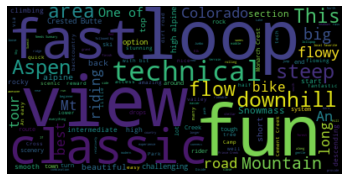

In [39]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# MTB_Trail_Data_EDA

In [41]:
all_df = pd.concat([crested_butte_df, marin_county_df, denver_df, park_city_df, sedona_df, moab_df])

In [42]:
print(all_df.tail())

          id                                  name   type  \
195  7006956  Rabbit Valley 8 Parallel Doubletrack  Trail   
196   194966                          Cross Canyon  Trail   
197  7025695                             Malachite  Trail   
198  7004959              Reservoir - 1 Trail #663  Trail   
199   171772                     Hunter Canyon Rim  Trail   

                                               summary difficulty  stars  \
195  A great alternative, or bailout from the ultra...       blue    3.5   
196  A great 'up' trail to connect different loops ...       blue    3.1   
197                   An alternative route to Azurite.  blueBlack    3.5   
198  A mixture of tough rooty climbs to get you up ...      black    3.5   
199  One of the last "Old-School" Moab rides where ...      black    3.3   

     starVotes location                                                url  \
195          2     moab  https://www.mtbproject.com/trail/7006956/rabbi...   
196         10     m

In [43]:
all_df.describe()

,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude
count,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.094509e+06,4.081250,22.534167,8.359750,934.098333,-1021.329167,6218.566667,5443.849167,-111.282606,38.479742
std,2.570708e+06,0.566531,45.441717,19.021649,1801.593338,1797.542571,3042.419928,2745.875860,5.510290,1.881793
min,3.180400e+04,0.000000,0.000000,0.100000,0.000000,-22549.000000,23.000000,-303.000000,-123.334600,34.151300
25%,3.733141e+06,3.800000,3.000000,1.400000,78.000000,-1234.750000,4666.750000,4366.000000,-111.932350,37.900025
50%,7.001508e+06,4.000000,9.000000,3.150000,354.500000,-464.000000,6187.000000,5638.000000,-110.918500,38.787350
75%,7.026000e+06,4.500000,22.000000,8.800000,1160.250000,-142.500000,8366.500000,7478.250000,-106.927775,39.757350
max,7.053888e+06,5.000000,570.000000,294.300000,21408.000000,0.000000,14418.000000,11840.000000,-104.762600,41.291700


In [103]:
text = " ".join(review for review in all_df.summary)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 81198 words in the combination of all review.


In [113]:
stopwords = set(STOPWORDS)
stopwords.update(["This,","An"])

In [114]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

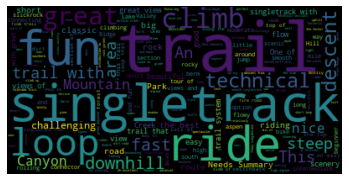

In [115]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [208]:
bike_mask = np.array(Image.open("../images/wordcloud_bike.png"))
bike_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [218]:
bike_mask[bike_mask == 0] = 255

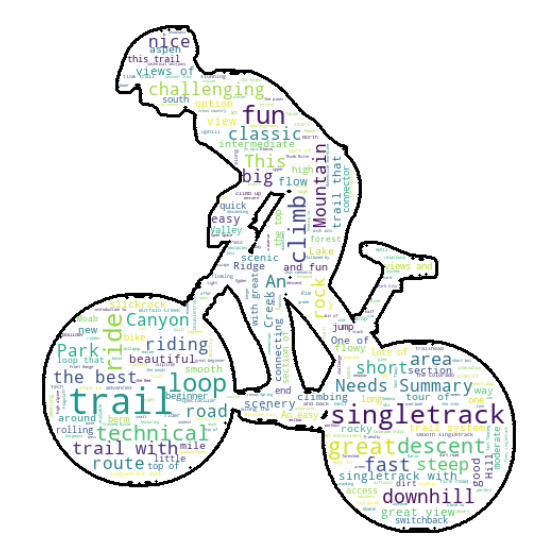

In [235]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=bike_mask,
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(text)

# store to file
# wc.to_file("../images/bike_wordcloud_after.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [228]:
bike_mask2 = np.array(Image.open("../images/wordcloud_bike_big.png"))
bike_mask2

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [229]:
bike_mask2[bike_mask2 == 0] = 255

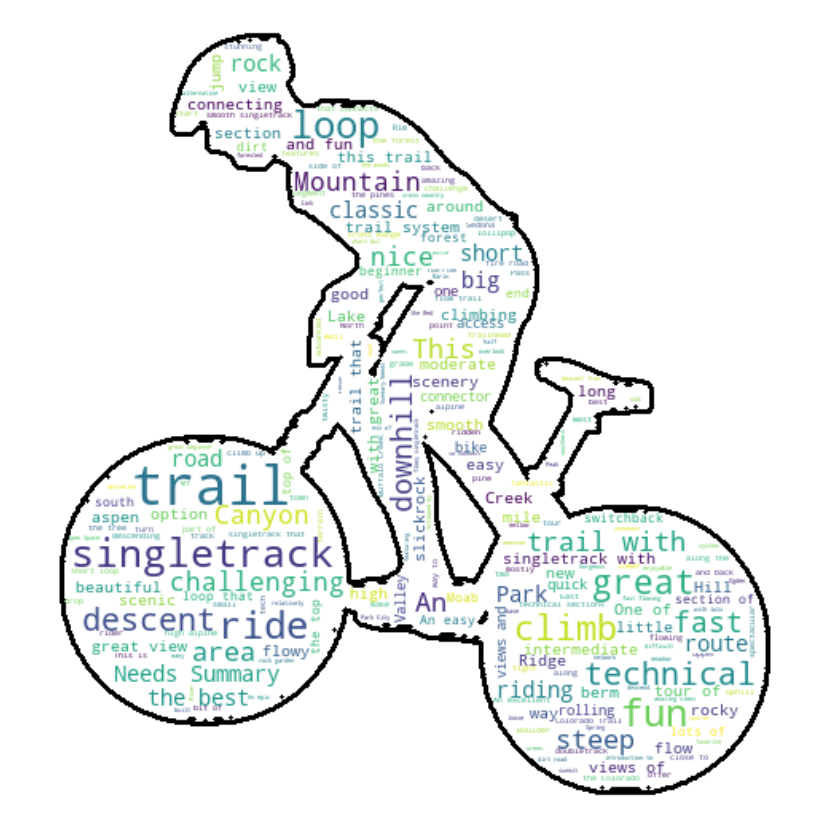

In [234]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=bike_mask,
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(text)

# store to file
# wc.to_file("../images/bike_wordcloud_after.png")

# show
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
all_df.corr(method ='pearson')

,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude
id,1.000000,0.045770,-0.334008,0.051266,0.046786,-0.044421,-0.057485,-0.068025,-0.168347,-0.019318
stars,0.045770,1.000000,0.099660,0.036089,0.016942,-0.074568,0.136733,0.130740,0.024644,0.008155
starVotes,-0.334008,0.099660,1.000000,0.051048,0.047924,-0.098295,0.100233,0.065391,0.219072,0.098377
length,0.051266,0.036089,0.051048,1.000000,0.917947,-0.898894,0.209388,0.017359,0.102930,-0.000150
ascent,0.046786,0.016942,0.047924,0.917947,1.000000,-0.933163,0.265797,0.040642,0.104042,0.044542
descent,-0.044421,-0.074568,-0.098295,-0.898894,-0.933163,1.000000,-0.325633,-0.091630,-0.140504,-0.051624
high,-0.057485,0.136733,0.100233,0.209388,0.265797,-0.325633,1.000000,0.957718,0.814044,0.284233
low,-0.068025,0.130740,0.065391,0.017359,0.040642,-0.091630,0.957718,1.000000,0.841151,0.270633
longitude,-0.168347,0.024644,0.219072,0.102930,0.104042,-0.140504,0.814044,0.841151,1.000000,0.294215
latitude,-0.019318,0.008155,0.098377,-0.000150,0.044542,-0.051624,0.284233,0.270633,0.294215,1.000000


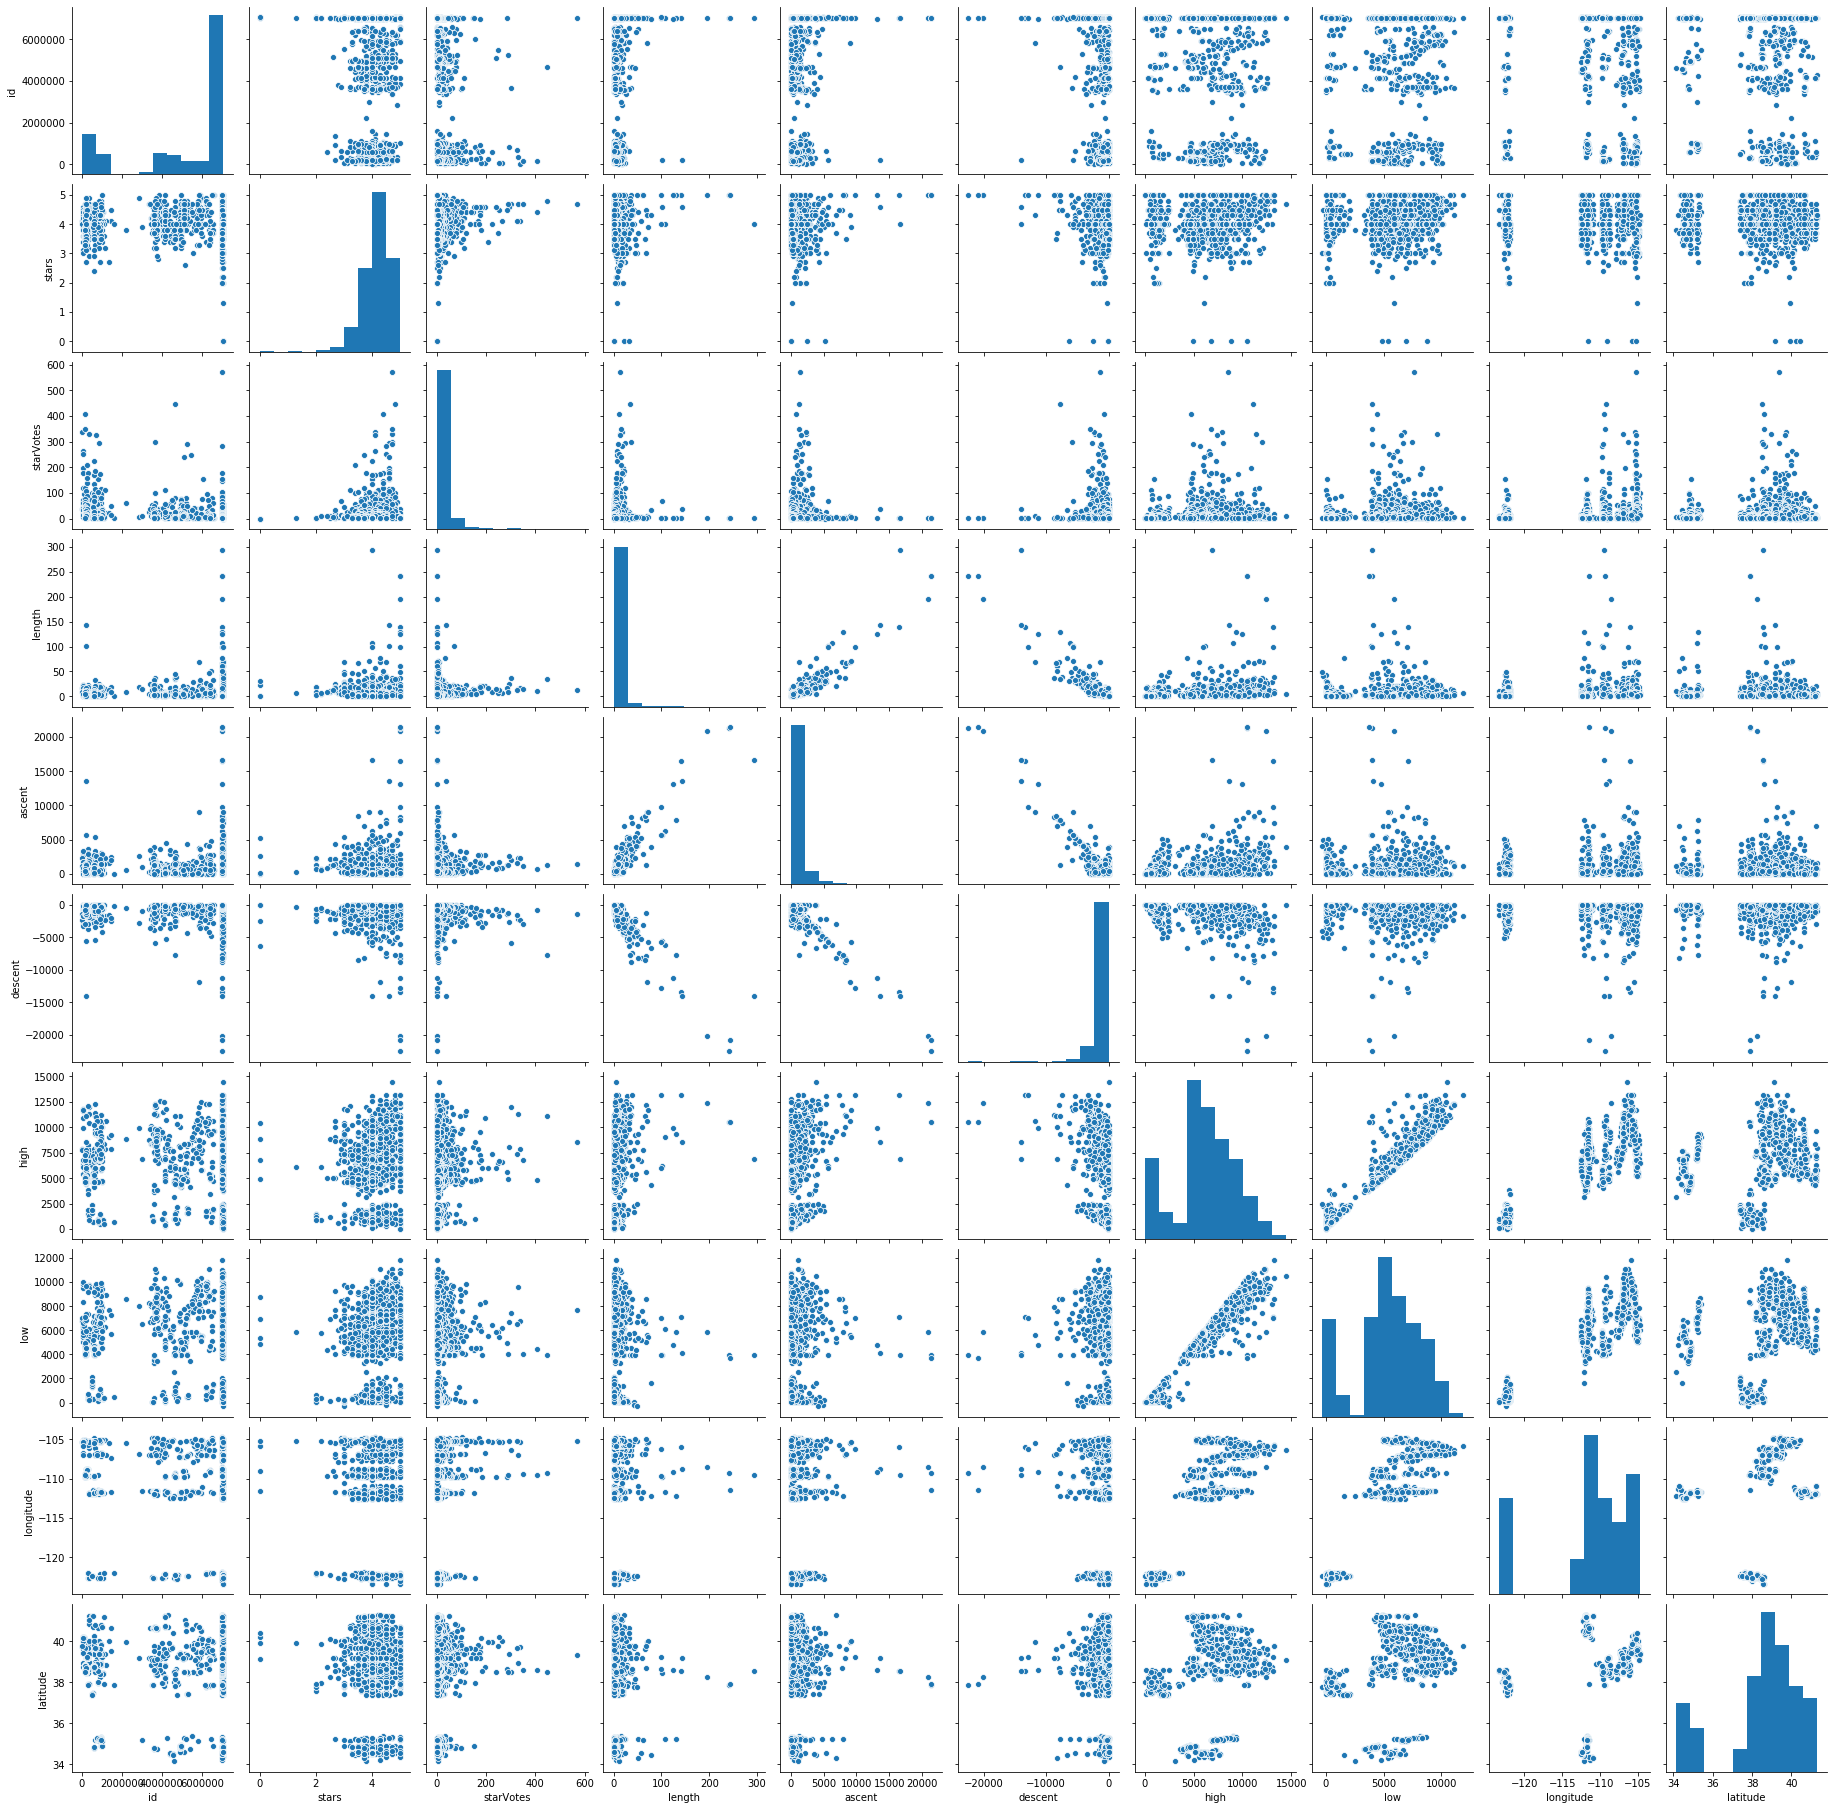

In [49]:
sns.pairplot(all_df)
plt.show()

In [165]:
all_df.groupby("location")["length"].agg([np.min,np.max,np.mean,np.median])

,amin,amax,mean,median
location,,,,
crested_butte,0.1,195.3,11.3735,5.30
denver,0.1,71.3,10.3420,7.15
marin_county,0.1,48.9,5.6035,1.80
moab,0.1,294.3,12.2035,3.30
park_city,0.1,32.8,3.8870,1.95
sedona,0.1,129.9,6.7490,2.55


In [83]:
all_df.groupby(["location"])["length"].median()

location
crested_butte    5.30
denver           7.15
marin_county     1.80
moab             3.30
park_city        1.95
sedona           2.55
Name: length, dtype: float64

In [248]:
all_df.groupby(["location"])["ascent"].mean()

location
crested_butte    1373.710
denver           1263.535
marin_county      772.085
moab             1013.155
park_city         571.885
sedona            610.220
Name: ascent, dtype: float64

In [66]:
all_df[all_df["length"] == 294.3]

,id,name,type,summary,difficulty,stars,starVotes,location,url,imgSqSmall,...,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate
33,7012756,Bikepacking: Moab to Boulder Town,Recommended Route,"A 5-day, southern-Utah desert bikepacking tour...",blue,4.0,1,moab,https://www.mtbproject.com/trail/7012756/bikep...,https://cdn2.apstatic.com/photos/mtb/7009331_s...,...,294.3,16628,-14007,6888,3968,-109.5508,38.5753,All Clear,Dry,2020-05-30 17:33:05


In [122]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1200 non-null   int64  
 1   name              1200 non-null   object 
 2   type              1200 non-null   object 
 3   summary           1200 non-null   object 
 4   difficulty        1200 non-null   object 
 5   stars             1200 non-null   float64
 6   starVotes         1200 non-null   int64  
 7   location          1200 non-null   object 
 8   url               1200 non-null   object 
 9   imgSqSmall        1200 non-null   object 
 10  imgSmall          1200 non-null   object 
 11  imgSmallMed       1200 non-null   object 
 12  imgMedium         1200 non-null   object 
 13  length            1200 non-null   float64
 14  ascent            1200 non-null   int64  
 15  descent           1200 non-null   int64  
 16  high              1200 non-null   int64  
 

In [173]:
m = folium.Map(
    location=[38.8697, -106.9878],
    zoom_start=8,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([38.4965, -106.3254], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)

m

In [194]:
for index, row in crested_butte_df.iterrows():
    if row['difficulty'] == 'black': 
        folium.CircleMarker([row['latitude'], row['longitude']],
                            radius=15,
                            popup=row['name'],
                            fill_color="#000000", # divvy color
                           ).add_to(m)
    elif row['difficulty'] == 'blue': 
        folium.CircleMarker([row['latitude'], row['longitude']],
                            radius=15,
                            popup=row['name'],
                            fill_color="#0000FF", # divvy color
                           ).add_to(m)
    elif row['difficulty'] == 'green': 
        folium.CircleMarker([row['latitude'], row['longitude']],
                            radius=15,
                            popup=row['name'],
                            fill_color="#008000", # divvy color
                           ).add_to(m)
    elif row['difficulty'] == 'blueBlack': 
        folium.CircleMarker([row['latitude'], row['longitude']],
                            radius=15,
                            popup=row['name'],
                            fill_color="#003366", # divvy color
                           ).add_to(m)
    elif row['difficulty'] == 'greenBlue': 
        folium.CircleMarker([row['latitude'], row['longitude']],
                            radius=15,
                            popup=row['name'],
                            fill_color="#00DDDD", # divvy color
                           ).add_to(m)
    elif row['difficulty'] == 'dblack': 
        folium.CircleMarker([row['latitude'], row['longitude']],
                            radius=15,
                            popup=row['name'],
                            fill_color="#000000", # divvy color
                           ).add_to(m)

In [195]:
m

In [196]:
# convert to (n, 2) nd-array format for heatmap
# stationArr = crested_butte_df[['latitude', 'longitude']].to_numpy()

# # plot heatmap
# m.add_children(plugins.HeatMap(stationArr, radius=15))
# m

In [197]:
# df_copy = crested_butte_df.copy()
# df_copy['count'] = 1
# HeatMap(data=df_copy[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)
# m

In [245]:
# all_df.groupby(["location","difficulty"])["stars"].agg([np.min,np.max,np.mean,np.median])
all_df.groupby(["location","difficulty"])["stars"].mean()

location       difficulty
crested_butte  black         4.265060
               blue          4.451667
               blueBlack     4.266667
               dblack        4.570000
               green         4.300000
               greenBlue     4.425000
denver         black         4.062500
               blue          3.978205
               blueBlack     4.105714
               dblack        4.300000
               green         3.560000
               greenBlue     3.646154
               missing       0.000000
marin_county   black         4.091489
               blue          3.988764
               blueBlack     4.100000
               dblack        3.950000
               green         4.272727
               greenBlue     4.400000
moab           black         4.003333
               blue          3.991549
               blueBlack     4.129730
               dblack        4.100000
               green         3.880000
               greenBlue     4.027273
               missing  

In [251]:
all_df[all_df["location"]=="crested_butte"]["ascent"].mean()

1373.71

In [252]:
all_df.groupby("location")["stars"].mean()

location
crested_butte    4.3440
denver           3.9515
marin_county     4.0655
moab             4.0025
park_city        4.0850
sedona           4.0390
Name: stars, dtype: float64